# GDP PER CAPITA

#### https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=1#panel-6

### I was only able to find state gdp (current US dollars), this will be the work of dividing the GDP by the population of the state to get the value of GDP per capita

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
co_df = pd.read_csv("../state_gdp/co_gdp.csv")
# co_df

In [3]:
co_df.drop(['GeoName'], axis=1, inplace=True)
co_df = co_df.T
# co_df

In [4]:
co_df.rename(columns = {0 : "gdp", "index": "quarters"}, inplace=True)

In [5]:
co_df.reset_index(inplace=True)
# co_df.head()

In [6]:
gdp_values = co_df["gdp"].tolist()

## Create a function that will add the quarters together and then put them into a list 

In [7]:
def get_total():
    years_totals = []
    quarter_1 = 0
    quarter_2 = 1
    quarter_3 = 2
    quarter_4 =3
    count = 1
    while count <= 8:  
        total = gdp_values[quarter_1] + gdp_values[quarter_2] + gdp_values[quarter_3] + gdp_values[quarter_4]
        years_totals.append(total)
        
        quarter_1 += 4
        quarter_2 += 4
        quarter_3 += 4
        quarter_4 += 4
        count += 1
    return years_totals

In [8]:
totals = get_total()
# totals

In [9]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": totals}
co_gdp_year = pd.DataFrame(data)
# co_gdp_year

 ## converting the from millions to the actual number 
 ### Data was abbreviate

In [10]:
gdp = co_gdp_year["gdp"].tolist()

In [11]:
def actual_total():
    gdp_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = gdp[value]*1000000
        gdp_total.append(total)
        value += 1
        count += 1
    return gdp_total

In [12]:
act_gdp = actual_total()

In [13]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": act_gdp}
co_gdp_year = pd.DataFrame(data)
# co_gdp_year

## import population data

In [14]:
pop_df = pd.read_csv("../state_pop/colorado_pop_cleaned.csv")
# pop_df

In [15]:
pop_df = pop_df.iloc[114:]
# pop_df.head()

## covert the population to the out of the thousands 

In [16]:
colorado_pop = pop_df["colorado_pop"].tolist()

In [17]:
def actual_pop():
    pop_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = colorado_pop[value]*1000
        pop_total.append(total)
        value += 1
        count += 1
    return pop_total

In [18]:
act_pop = actual_pop()

In [19]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "population": act_pop}
co_pop_year = pd.DataFrame(data)
# co_pop_year

## Merge both DS

In [20]:
# need the population without the year column 
merged_df = pd.merge(co_gdp_year, co_pop_year, how="outer", on=["year"])
merged_df

,year,gdp,population
0,2014,1.238170e+12,5352637.0
1,2015,1.282884e+12,5454328.0
2,2016,1.319647e+12,5543844.0
3,2017,1.395592e+12,5617421.0
4,2018,1.485698e+12,5697155.0
5,2019,1.568872e+12,5758486.0
6,2020,1.530339e+12,5784308.0
7,2021,1.687766e+12,5812069.0


## Finding the GDP per captia of Colorado

In [21]:
# make lists from columns for population and gdp

population_list = merged_df.population.to_list()

gdp_list = merged_df.gdp.to_list()

per_capita_list = []

#function to divide gdp by population

def per_capita():

    for population, gdp in zip(population_list, gdp_list):

        per_capita_list.append((gdp/population))
        
    return per_capita_list

## insert per capita list as new column

In [22]:
per_capita_list = per_capita()

In [23]:
capita_data = {"gdp_per_capita": per_capita_list}
capita_column = pd.DataFrame(capita_data)

In [24]:
merged_df.insert(3, "gdp_per_capita", capita_column, True)

In [25]:
merged_df = pd.DataFrame(merged_df)

# Adding marijuana tax 

In [26]:
co_mj_tax = pd.read_csv("../marijuana_tax/colorado_marijuana_cleaned.csv")
co_mj_tax = pd.DataFrame(co_mj_tax)
# co_mj_tax.dropna()

In [27]:
co_mj_tax = co_mj_tax.loc[{12, 25, 38, 51, 64, 77, 90, 103}]
# co_mj_tax

In [28]:
co_mj_tax = co_mj_tax.sort_index()
# co_mj_tax

In [29]:
co_mj_tax = pd.DataFrame(co_mj_tax)
co_mj_tax = co_mj_tax.reset_index()
co_mj_tax

,index,Revenue Month,Revenue Year,state_sales_ta_total,medical_marijuana,retail_marijuana,RMS_tax_total,RMS_local_government_distribution,RMS_retained_by_state_total,RMS_marijuana_tax_cash_fund,RMS_public_school_fund,RMS_general_fund,RME_tax_total,RME_public_school_capital_construction_assistance_fund,RME_public_school_fund,license_and_fees_total,total_taxes_and_fees
0,12,whole_year,2014.0,"$17,834,802","$9,997,717","$7,837,085","$26,892,566","$4,005,458","$22,695,484",$0,$0,$0,"$11,375,268","$11,350,509",$0,"$11,491,686","$67,594,323"
1,25,whole_year,2015.0,"$26,968,987","$11,243,398","$15,725,588","$55,616,542","$8,237,905","$46,681,343",$0,$0,$0,"$33,417,832","$33,049,732",$0,"$14,407,812","$130,411,173"
2,38,whole_year,2016.0,"$36,448,955","$12,462,466","$23,986,489","$83,750,123","$12,636,490","$71,607,263",$0,$0,$0,"$59,420,537","$57,286,595","$2,450,958","$13,985,194","$193,604,810"
3,51,whole_year,2017.0,"$30,536,901","$11,857,911","$18,678,991","$131,512,817","$16,204,671","$115,574,067","$46,451,938","$18,199,333",$0,"$71,965,027","$40,256,542","$31,558,384","$13,353,728","$247,368,473"
4,64,whole_year,2018.0,"$10,828,237","$9,479,980","$1,348,257","$181,854,222","$18,190,808","$163,581,716","$117,533,463","$20,854,654","$25,193,599","$61,612,669","$33,052,463","$27,752,967","$12,234,509","$266,529,637"
5,77,whole_year,2019.0,"$11,234,906","$9,738,465","$1,496,441","$212,487,924","$21,205,609","$190,795,031","$137,086,230","$24,021,094","$29,687,707","$66,667,126","$61,626,623","$5,849,826","$12,068,469","$302,458,426"
6,90,whole_year,2020.0,"$13,858,886","$12,456,468","$1,402,419","$260,528,061","$26,071,623","$234,700,412","$168,632,246","$29,548,782","$36,519,384","$101,499,043","$83,807,805","$16,688,733","$11,594,120","$387,480,110"
7,103,whole_year,2021.0,"$14,531,331","$12,290,101","$2,241,230","$277,618,532","$27,751,724","$249,835,702","$179,506,952","$31,454,315","$38,874,435","$118,538,471","$55,483,720","$63,657,918","$12,797,719","$423,486,053"


## Merging the total taxes to the merged_df 

In [30]:
mj_tax_revenue = co_mj_tax["total_taxes_and_fees"]

In [31]:
merged_df = merged_df.join(mj_tax_revenue)
merged_df

,year,gdp,population,gdp_per_capita,total_taxes_and_fees
0,2014,1.238170e+12,5352637.0,231319.684111,"$67,594,323"
1,2015,1.282884e+12,5454328.0,235204.813499,"$130,411,173"
2,2016,1.319647e+12,5543844.0,238038.263703,"$193,604,810"
3,2017,1.395592e+12,5617421.0,248440.040367,"$247,368,473"
4,2018,1.485698e+12,5697155.0,260779.002853,"$266,529,637"
5,2019,1.568872e+12,5758486.0,272445.205215,"$302,458,426"
6,2020,1.530339e+12,5784308.0,264567.274080,"$387,480,110"
7,2021,1.687766e+12,5812069.0,290389.842240,"$423,486,053"


In [32]:
co_plot_df = merged_df.drop(columns=["gdp","population"])

In [33]:
co_plot_df = co_plot_df.rename(columns = {"total_taxes_and_fees":"mj_tax_revenue"})

In [34]:
co_plot_df.replace({'\$':'', '\,':'', '\(':'', '\)':''}, regex = True, inplace= True)
co_plot_df.head()

,year,gdp_per_capita,mj_tax_revenue
0,2014,231319.684111,67594323
1,2015,235204.813499,130411173
2,2016,238038.263703,193604810
3,2017,248440.040367,247368473
4,2018,260779.002853,266529637


In [35]:
co_plot_df['mj_tax_revenue'] = co_plot_df['mj_tax_revenue'].astype(str).astype(int)

In [36]:
co_plot_df

,year,gdp_per_capita,mj_tax_revenue
0,2014,231319.684111,67594323
1,2015,235204.813499,130411173
2,2016,238038.263703,193604810
3,2017,248440.040367,247368473
4,2018,260779.002853,266529637
5,2019,272445.205215,302458426
6,2020,264567.274080,387480110
7,2021,290389.842240,423486053


## Plotting data

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

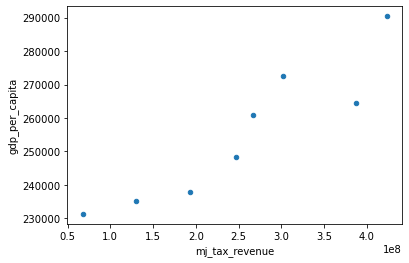

In [37]:
co_plot_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

## Checking correlation

In [38]:
import scipy.stats as stats

In [39]:
co_plot_df.corr()

,year,gdp_per_capita,mj_tax_revenue
year,1.000000,0.957638,0.992243
gdp_per_capita,0.957638,1.000000,0.923814
mj_tax_revenue,0.992243,0.923814,1.000000


#### 1. r: Pearson’s correlation coefficient
#### 2. p-value: long-tailed p-value

In [40]:
stats.pearsonr(co_plot_df['gdp_per_capita'], co_plot_df['mj_tax_revenue'])

(0.9238139463811241, 0.0010433132264456076)

## looking at the differences

In [41]:
diff_df = co_plot_df.diff()

In [42]:
diff_df = diff_df.dropna()

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

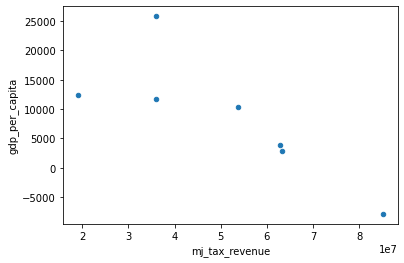

In [43]:
diff_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

In [44]:
stats.pearsonr(diff_df['gdp_per_capita'], diff_df['mj_tax_revenue'])

(-0.8024164109757832, 0.029870491405940426)

## Linear Regression

In [45]:
import statsmodels.formula.api as smf

In [46]:
res2 = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=co_plot_df).fit() 
res2.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     34.94
Date:                Tue, 05 Jul 2022   Prob (F-statistic):            0.00104
Time:                        21:21:48   Log-Likelihood:                -82.593
No. Observations:                   8   AIC:                             169.2
Df Residuals:                       6   BIC:                             169.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.155e+05   7345.107     29.345      0.000    1.98e+05    2.34e+05
mj_tax_revenue     0.0002   2.66e-05      5.911      0.001     9.2e-05       0.000
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   2.463
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.709
Skew:                          -0.227   Prob(JB):                        0.702
Kurtosis:                       1.615   Cond. No.                     6.75e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Difference Linear Regression

In [47]:
res = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=diff_df).fit() 
res.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     9.040
Date:                Tue, 05 Jul 2022   Prob (F-statistic):             0.0299
Time:                        21:21:48   Log-Likelihood:                -70.532
No. Observations:                   7   AIC:                             145.1
Df Residuals:                       5   BIC:                             145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.769e+04   6900.504      4.013      0.010    9952.768    4.54e+04
mj_tax_revenue    -0.0004      0.000     -3.007      0.030      -0.001   -5.49e-05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.744
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.762
Skew:                           0.807   Prob(JB):                        0.683
Kurtosis:                       3.097   Cond. No.                     1.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""